# 지식iN 데이터 워드 클라우드로 그리기

# 201600282 엄기산

In [1]:
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

In [2]:
# 시간이 오래 소요됩니다! 

from tqdm.notebook import tqdm

tmp_list = [] 

for i in tqdm(range(20, 21)):
    url = "https://kin.naver.com/search/list.nhn?query=%EB%B9%BC%EB%B9%BC%EB%A1%9C+%EB%8D%B0%EC%9D%B4&page="+str(i)
    html = urlopen(url)

    soup = BeautifulSoup(html.read(), "html.parser")

    docs = soup.find("ul", {"class": "basic1"}).find_all("li")


    for doc in docs:
        ans = doc.find_all("dd")[1]
        tmp_list.append(ans.text.strip())

    time.sleep(0.5)
    
print(len(tmp_list))

  0%|          | 0/49 [00:00<?, ?it/s]

490


In [3]:
from konlpy.tag import Okt
okt = Okt()

In [4]:
ko_doc = '\n'.join(tmp_list)
print(ko_doc[:1000])

빼빼로와 빼빼로데이 라는 단어는 특정기업의 상표권등록이 되어있는것으로 알고있습니다. 그런데 빼빼로데이라는 단어는 식품이 아닌 다른 제품에(예를들면 볼펜류) 상표권...
트와이스 걸 그룹이 빼빼로 데이 지나고 다음 날 새 앨범을 내는 이유는 무엇인지요?  굳이 빼빼로데이라는 건 의식해서 다음날 앨범을 내거나 빼빼로데이를 의식해서 그날...
부산에 있는 남자친구 회사에 빼빼로데이에 맞춰... 지인들에게도 추천드리는 빼빼로데이선물 BEST... 러블리 로즈베어 빼빼로6개입 빼빼로선물세트 빼빼로데이, 2....
작년에 남편한테 빼빼로데이선물로 스킨,로션,에센스... 올해 빼빼로데이선물은 올인원 제품으로 할까하는데... 부탁드려요  빼빼로데이선물 할 시즌이 다가 오긴 하네요.ㅎㅎ...
빼빼로데이는 여자가 주는건가요? 남자가 주는건가요?  안녕하세요! 달달함이 가득한 11월11일 빼빼로 데이는... 혹시 빼빼로데이에 소중한 분께 선물을 드려야해서...
대학생들 빼빼로데이날 빼빼로 학교에 가져오나요  누구 줄사람있으면 주고 없으면 안 챙겨오고 오늘 빼빼로데이네 하고 매점가서 그날 구매해서 주기도 하고 먹기도 하고 합니다
빼빼로 데이에 친구들은 저에게 수제 빼빼로를 만들어준다고 하는데 저도 친구들처럼... 빼빼로 데이에 친구들에게 선물하면 괜찮은 수제 빼빼로를 몇 가지 링크 걸어드릴 테니...
제가 이 질문을 하는 시간 또한 11월 11일 인데 혹시 11월 11일이 빼빼로 데이인 이유가... DAY) 빼빼로 데이 - 대한민국 앙골라 독립기념일 - 앙골라 영령 기념일 - 영연방...
빼빼로데이때 저는 남친 줄려고 선물세트를 한박스 샀는데 남자친구는 만약에 빼빼로... 굳이 빼빼로데이 때 빼빼로 갯수로 마음을 확인하지 않으셨으면 좋겠습니다^^
곧 빼빼로 데이인데 평범한거 주기 싫어서 프레첼에 초코 묻혀서 포장해서 친구들 주려고 합니다 근데 미리 구매를 못해서 이마트에 가서 쟤료를 사려고 해요 지금...
작년에 남편한테 빼빼로데이선물로 스킨,로션,에센스... 올해 빼빼로데이선물은

In [5]:
print(len(ko_doc))

44321


In [6]:
import time

start = time.time()
ko_doc_noun = okt.nouns(ko_doc)
print(time.time()-start)

11.984489917755127


In [7]:
from collections import Counter

count_noun = Counter(ko_doc_noun)

In [8]:
count_noun.most_common(20)

[('빼빼로데이', 645),
 ('빼빼로', 522),
 ('선물', 399),
 ('데이', 206),
 ('때', 109),
 ('요', 103),
 ('남자친구', 93),
 ('제', 89),
 ('추천', 88),
 ('날', 74),
 ('친구', 74),
 ('여자친구', 71),
 ('저', 55),
 ('그냥', 55),
 ('이번', 48),
 ('것', 43),
 ('세트', 42),
 ('남친', 42),
 ('좀', 40),
 ('뭐', 39)]

In [9]:
stopword_list = ['빼빼로데이', '빼빼로', '데이']

for word in count_noun:
    if len(word) == 1:
        stopword_list.append(word)
        
stopword_list[-5:]

['힌', '멍', '름', '뎡', '뒤']

In [10]:
# stopword 단어를 모두 pop()

for stopword in stopword_list:
    if stopword in count_noun:
        count_noun.pop(stopword)

In [11]:
import numpy as np
from PIL import Image

img_mask = np.array(Image.open('present.jpg'))

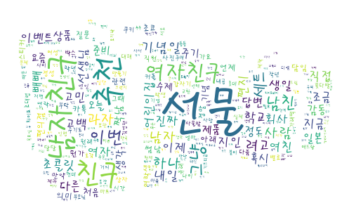

In [12]:
from wordcloud import WordCloud

# mac OS: '/Library/Fonts/NanumBarunGothic.ttf'
wc_noun = WordCloud(background_color='white', max_words=2000, 
                     font_path=r'C:\Windows\Fonts\HMFMPYUN.ttf', mask=img_mask)
wc_noun = wc_noun.generate_from_frequencies(count_noun)

import matplotlib.pyplot as plt
plt.imshow(wc_noun, interpolation="bilinear")
plt.axis("off")
plt.show()